In [4]:
from __future__ import division
import os
import ast
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
#import distance
import networkx as nx

%matplotlib inline

#### Extracting sequences

In [5]:
trnas = {}

for aa in os.listdir('../data/'):
    trnas[aa[:-4]] = pd.DataFrame.from_csv('../data/' + aa, sep = '\t')
    
def adjacence_arn(trnas_df, arn, idx):
    """ returns the name of the arn adjacents to 'idx' """
    adjacence_list = trnas['trp'].ix[idx]['Adjacency']
    # we use ast.literal_eval because the list is a string
    adjacence_list = [ trnas['trp'].ix[j].name for j in ast.literal_eval(adjacence_list) ]
    return adjacence_list

def check_index_in_range(trnas_df, arn):
    """ checks if rna's adjacence nodes are in range """
    max_index = 0
    for index, columns in trnas[arn].iterrows():
        adj =  ast.literal_eval( columns['Adjacency'] )
        if adj: 
            tmp_max = max(adj)
            if tmp_max > max_index: max_index = tmp_max
    print ('number of elements: %d, maximum index: %d' % (trnas[arn].index.size, max_index))
    
def posible_combinations_in_natrue(trnas_df, arn):
    POSSIBLE_LETTERS = 4
    name = trnas[arn].ix[0].name
    l = len(name)
    print ('There are %d different combinations of %s' % (np.power(POSSIBLE_LETTERS, l), arn))
    
    

Some checks to get in touch with the datasets

In [6]:
idx = 3
ad_list = adjacence_arn(trnas, 'trp', idx)

print (trnas['trp'].ix[idx].name)

for name in ad_list:
    print (name)

print '\nchecking index are in range:'
check_index_in_range(trnas, 'ala')
check_index_in_range(trnas, 'trp')

print
posible_combinations_in_natrue(trnas, 'trp')




TCCCTGATCAGGGAGTCCGGACCCTGCGCAGGCCGGGCCTGG
TCCCTGATCAGGGAGTCCGGACCCTGCGCAGGCTGGGCCTGG
TCCCTGGTCAGGGAGTCCGGACCCTGCGCAGGCCGGGCCTGG

checking index are in range:
number of elements: 3192, maximum index: 3190
number of elements: 889, maximum index: 888

There are -9223372036854775808 different combinations of trp


#### Plotting graphs

In [13]:
def build_graph(aa):
    size_weight = 50
    thickness_i = 2.
    
    H = nx.Graph()
    H.size = {}
    H.color = {}
    H.width = {}
    
    print ('Building the graph')
    
    # add nodes
    for i in trnas[aa].index:
        H.add_node(i) # i is the name e.g., TCCCTGAT...
        H.size[i]=trnas[aa]['Frequency'].ix[i]*size_weight
        H.color[i]='red'

    # add links
    for i in trnas[aa].index:
        adjacence_list_of_i = ast.literal_eval(trnas[aa]['Adjacency'].ix[i])
            
        for j in adjacence_list_of_i:
            H.add_edge(i, trnas[aa].ix[j].name, {'color':'gray', 'thickness':thickness_i})

    color=[ attribs['color'] for (v_from,v_to,attribs) in H.edges(data=True) ]
    thickness=[attribs['thickness'] for (v_from,v_to,attribs) in H.edges(data=True)]
    
    print ('Plotting the graph')
    plt.figure(figsize=[50,50])
    plt.title(aa.upper(), fontsize=50)
    nx.draw_networkx(H, with_labels=False, node_color=[H.color[v] for v in H],\
                     node_size=[H.size[v] for v in H], alpha=0.5,\
                     width=thickness, edge_color=color)
    return H

Building the graph
Plotting the graph
CPU times: user 4.41 s, sys: 1.13 s, total: 5.54 s
Wall time: 5.57 s


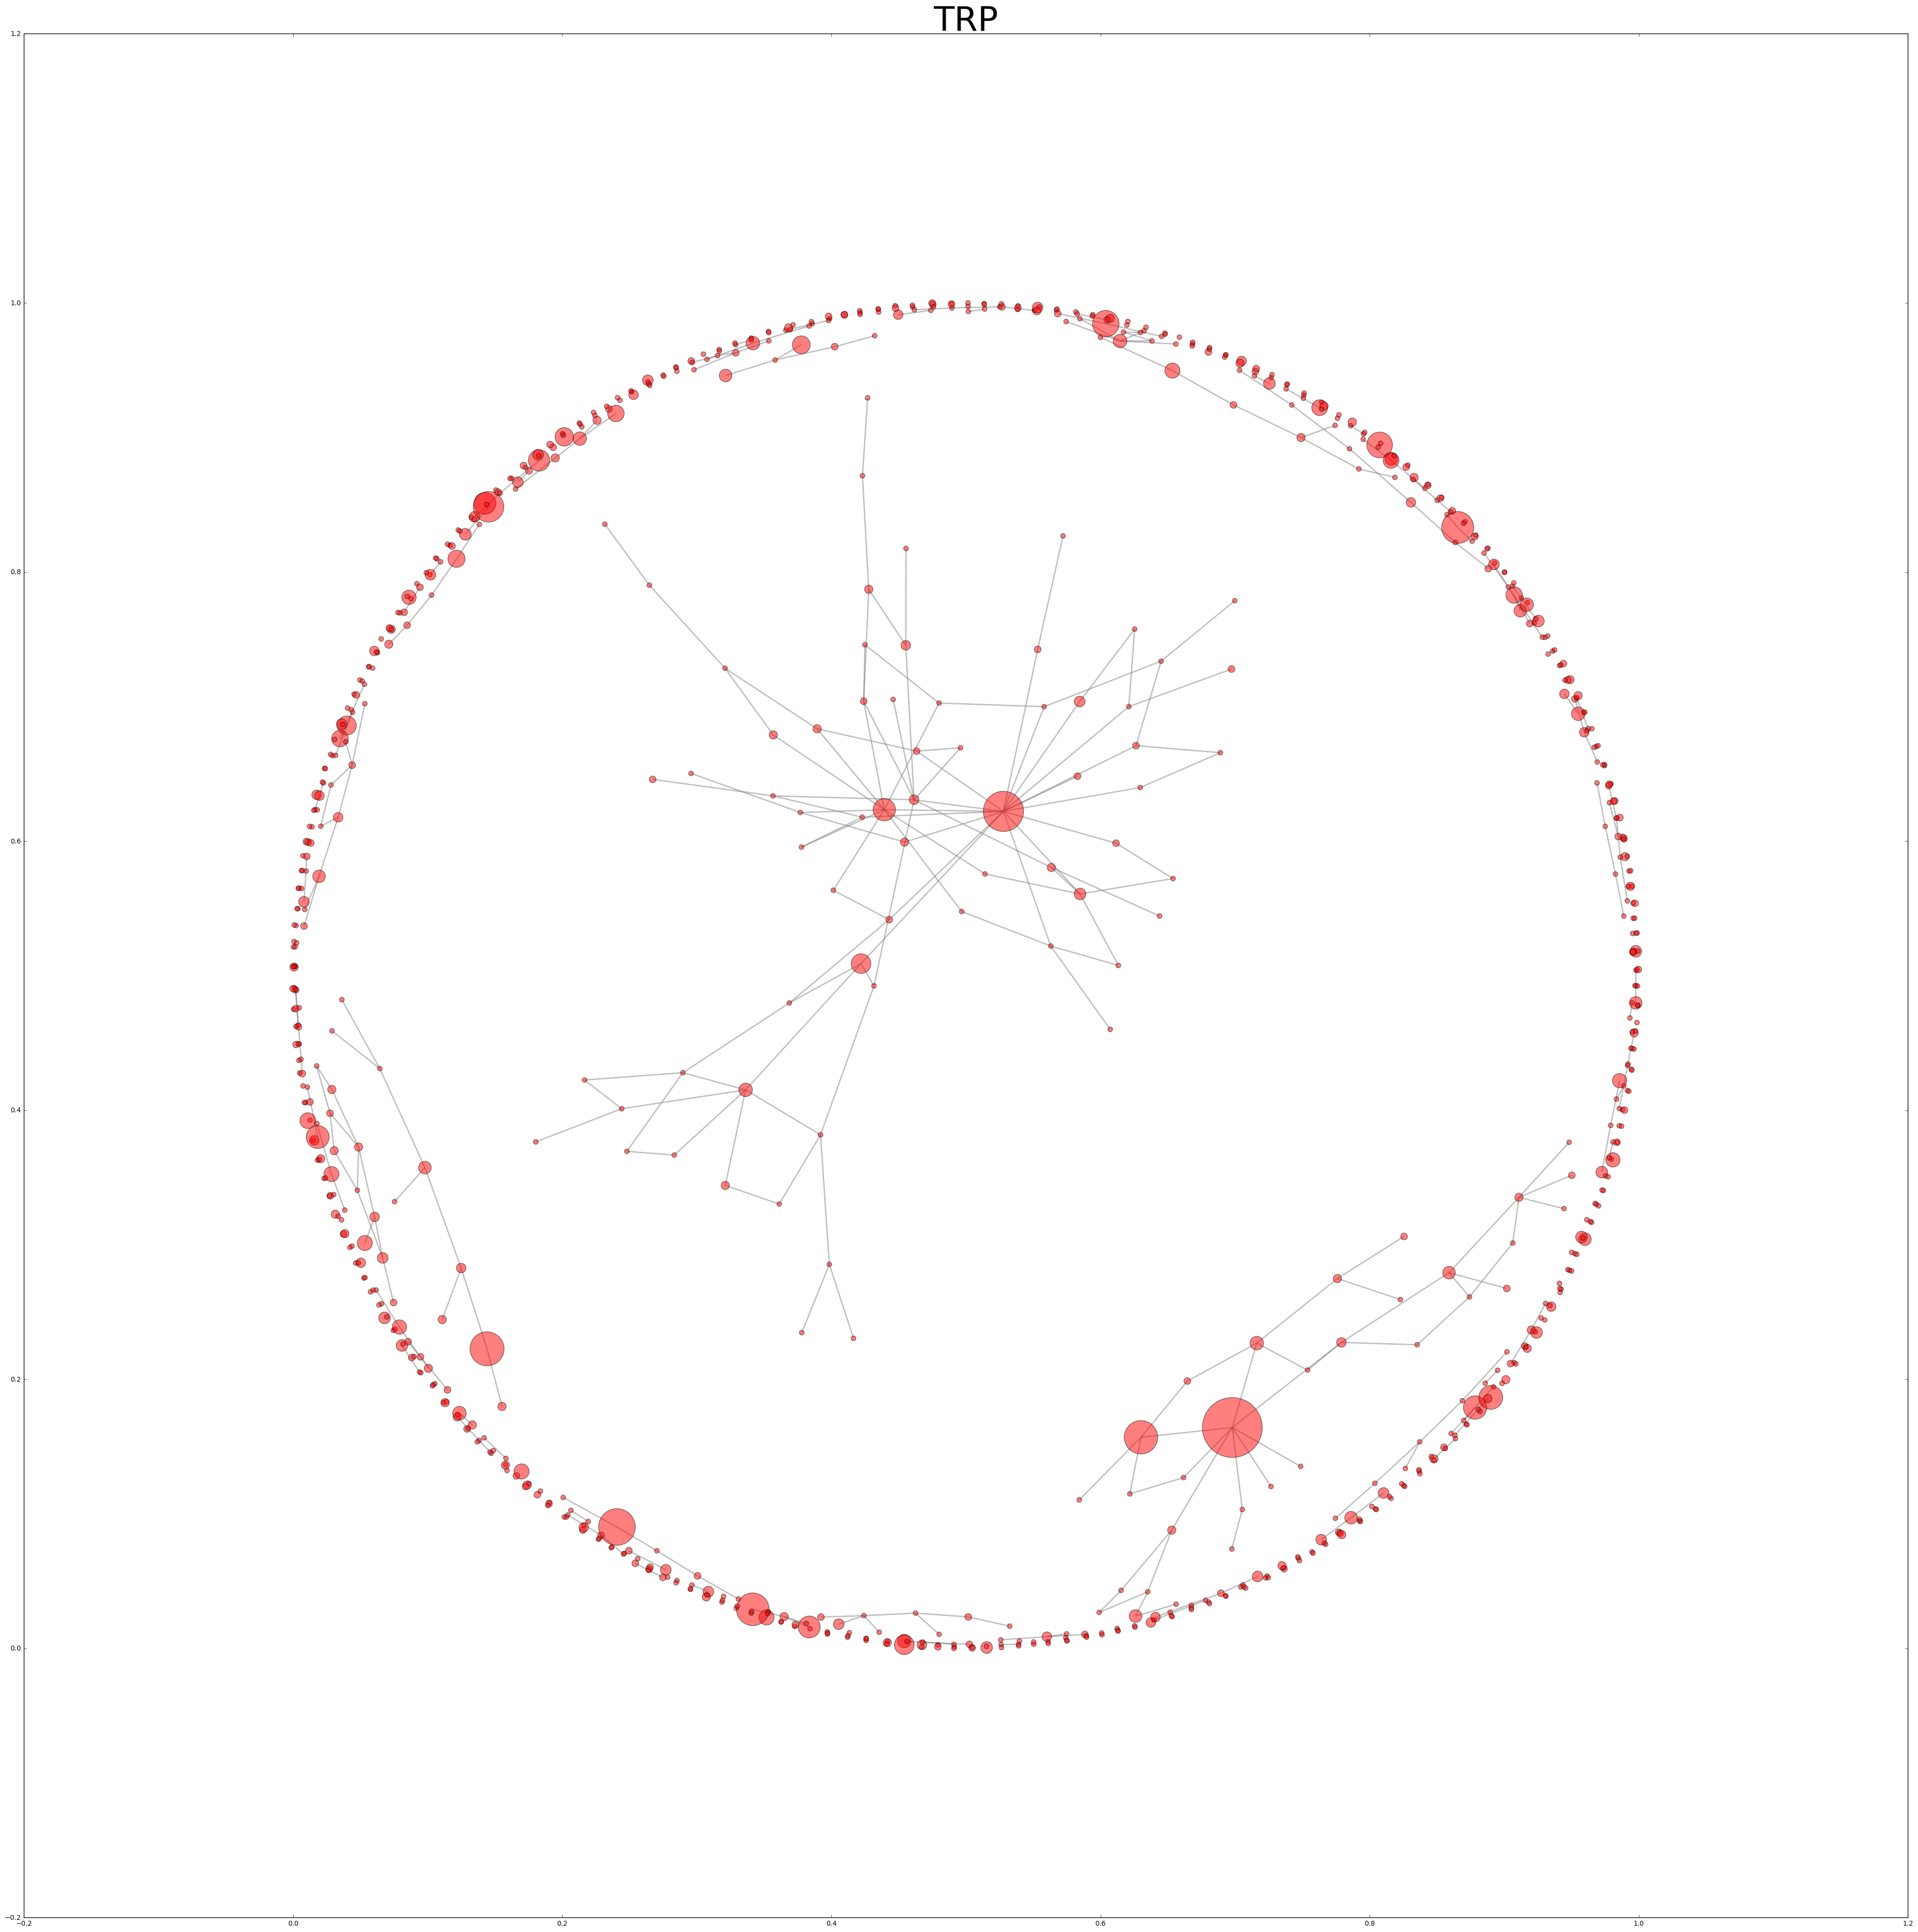

In [9]:
%time G = build_graph('trp')

Building the graph
Plotting the graph
CPU times: user 47.4 s, sys: 15.4 s, total: 1min 2s
Wall time: 1min 3s


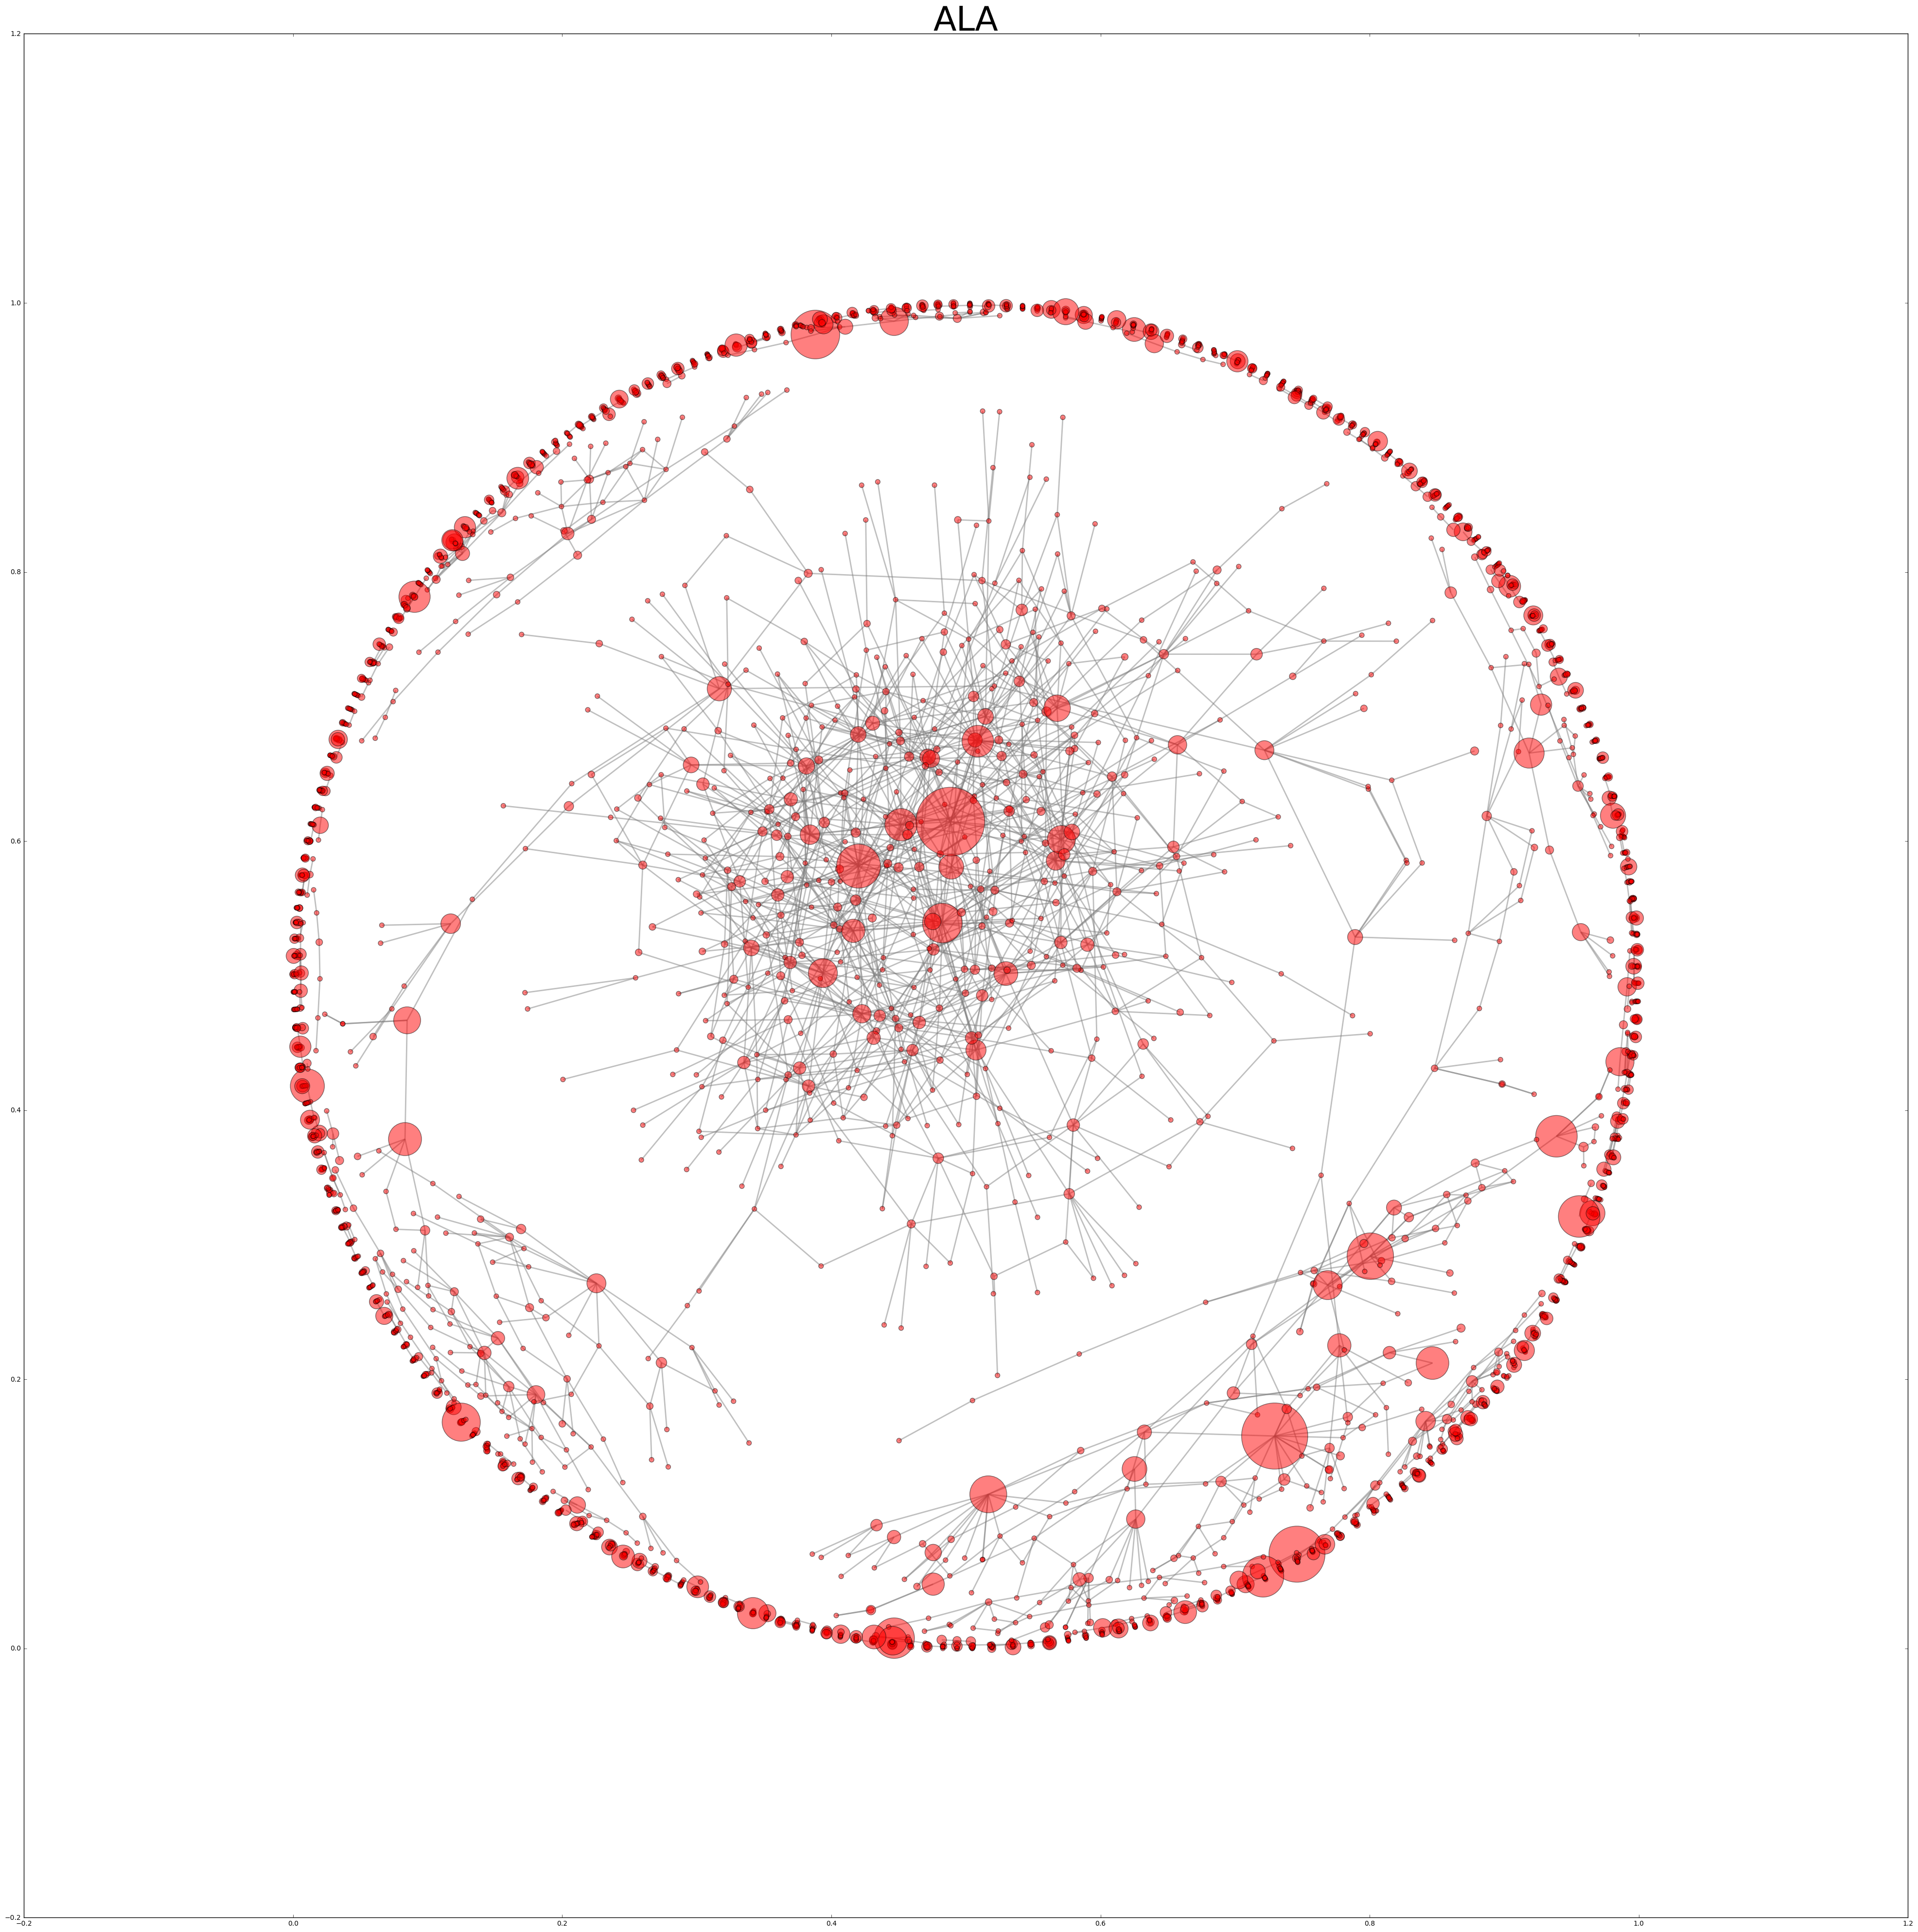

In [11]:
%time build_graph('ala')

In [18]:
H = nx.Graph()
H.size = {}
H.color = {}
H.width = {}

aa = 'trp'
for i in trnas[aa].index:

    H.add_node(i)
    H.size[i]=trnas[aa]['Frequency'].ix[i]*50
    H.color[i]='red'

for i in trnas[aa].index:
    for j in ast.literal_eval(trnas[aa]['Adjacency'].ix[i]):
        H.add_edge(trnas[aa].ix[i].name, trnas[aa].ix[j].name, {'color':'gray','thickness':2})

In [19]:
x = nx.greedy_color(H).values()

In [21]:
max(x)

2

# Case of study: TRP

Building the graph
Plotting the graph
CPU times: user 4.17 s, sys: 1.05 s, total: 5.21 s
Wall time: 5.18 s


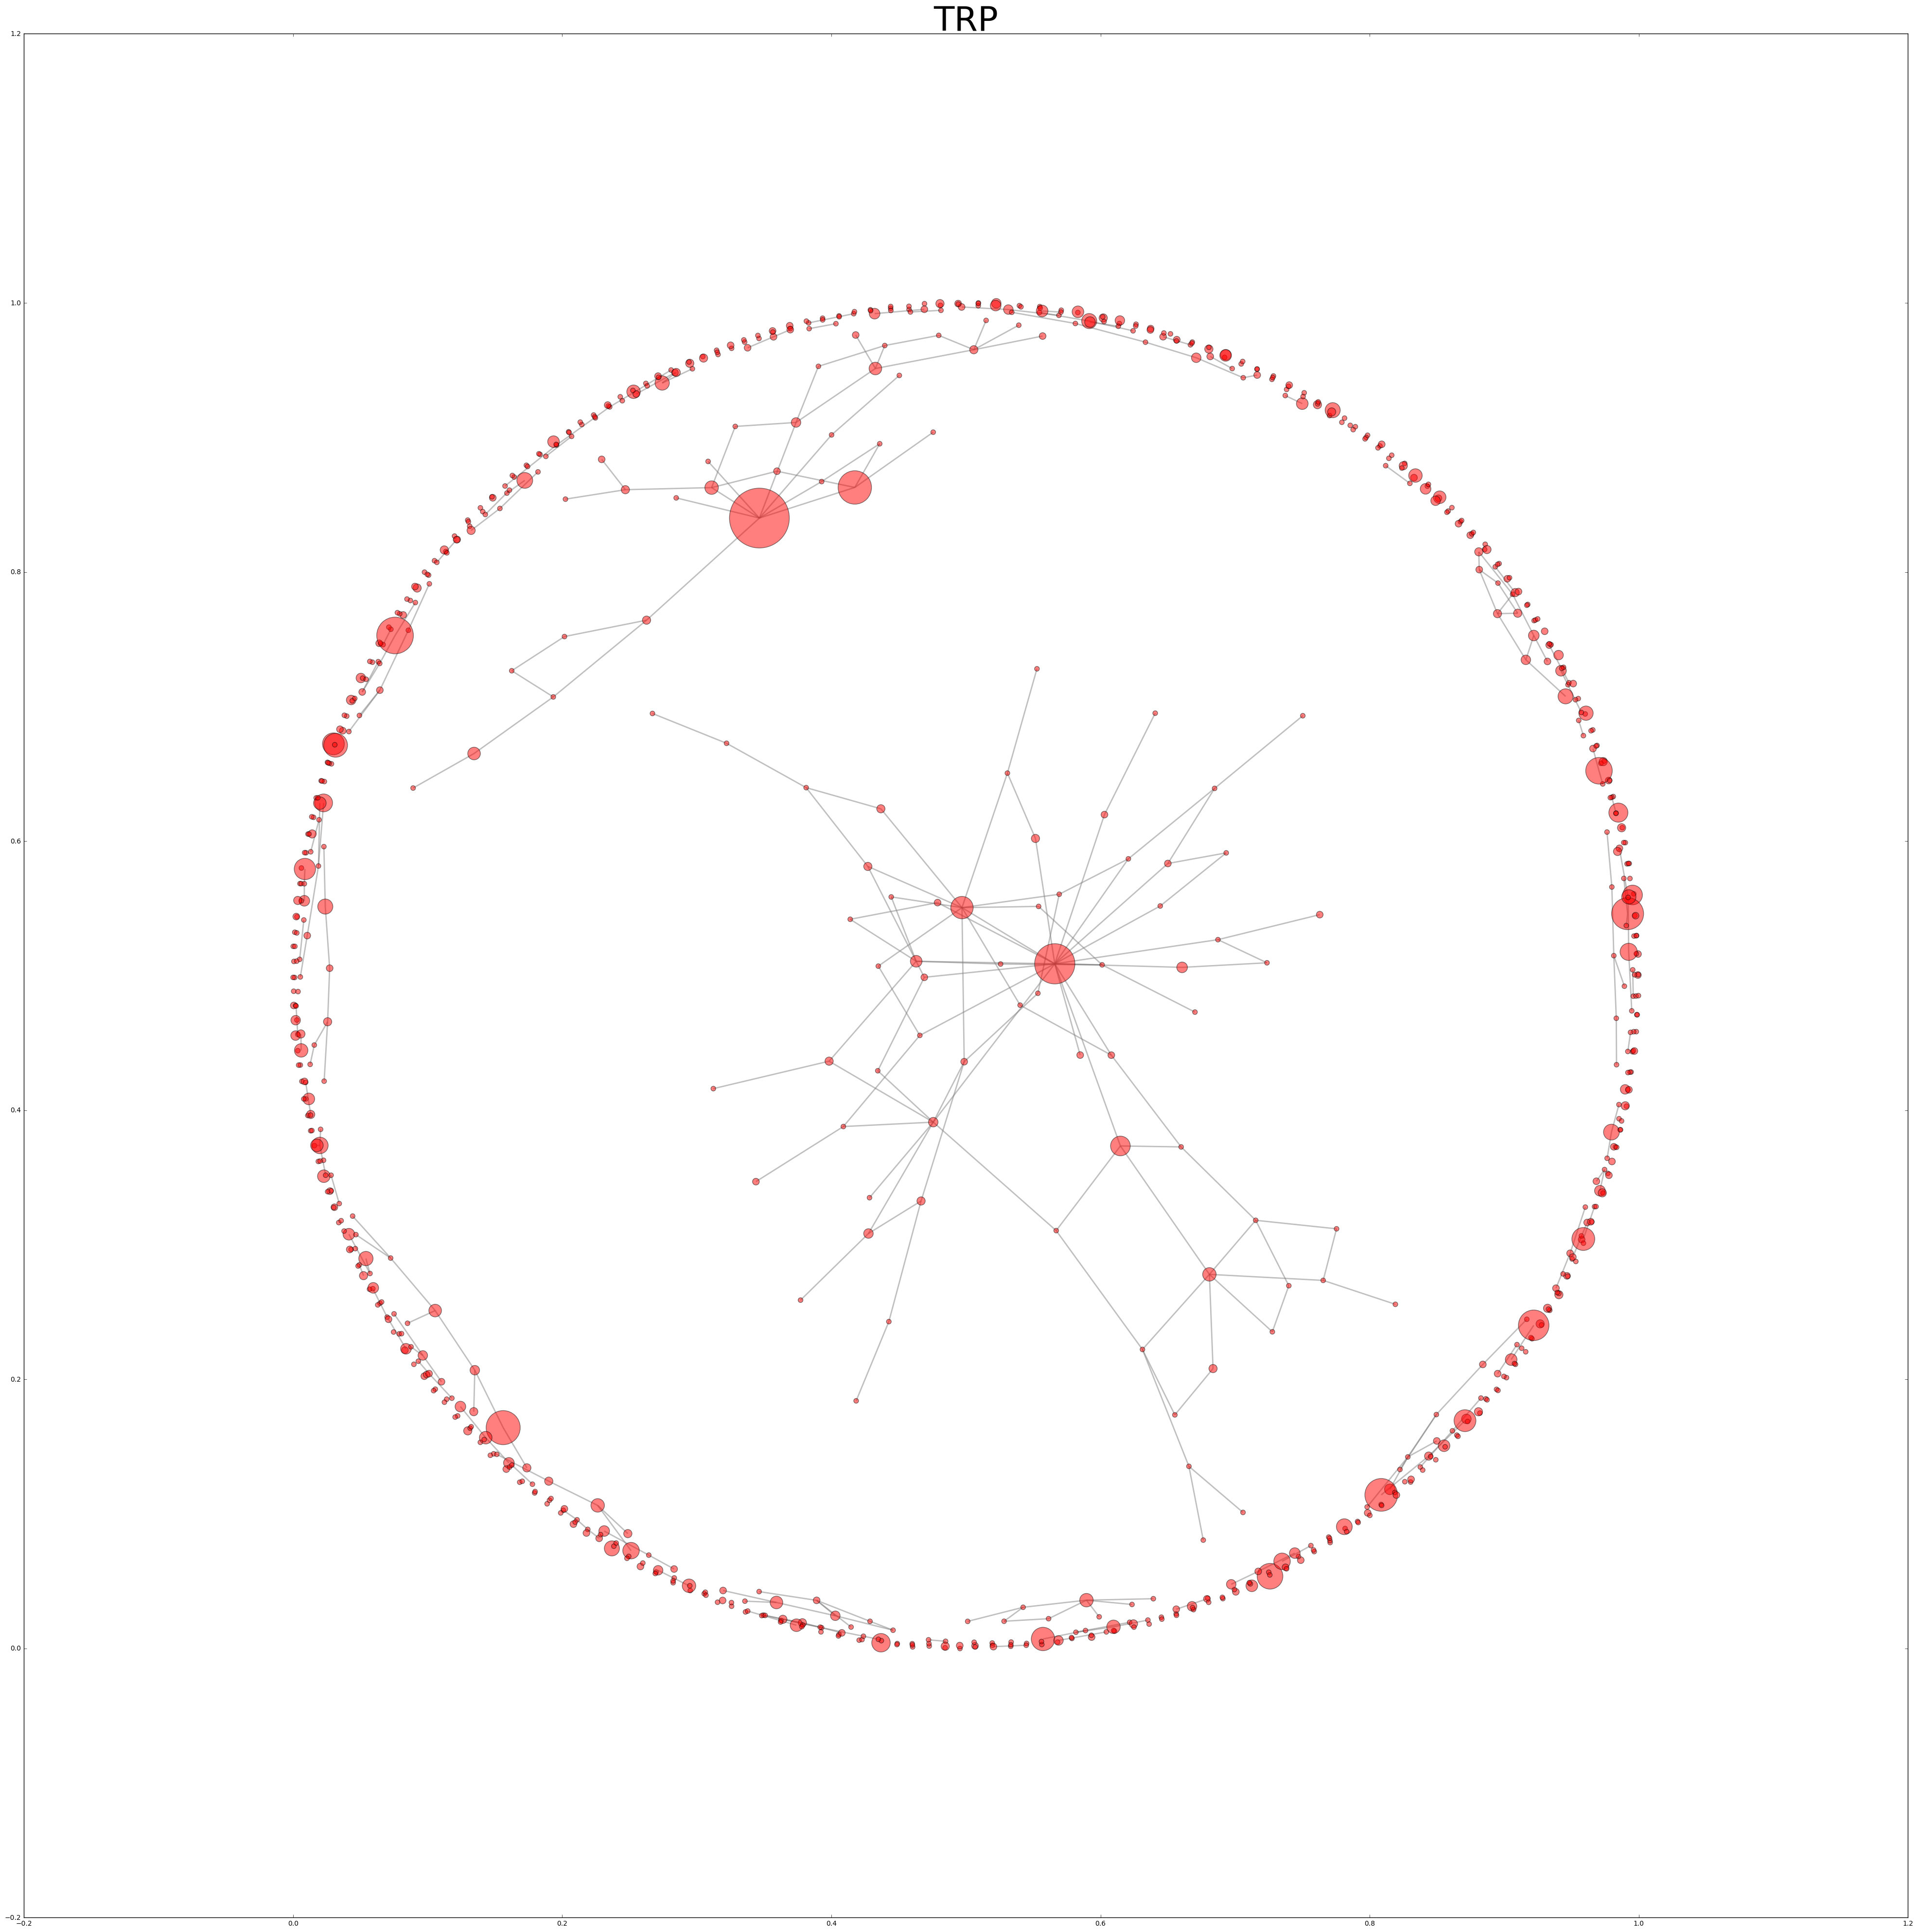

In [14]:
# Generate the graph or network
%time G = build_graph('trp')

This graph is an undirected unweighted network, where nodes (vertices) are trp sequences, and links (edges) exist betwenn two nodes if there is only one mutation in the chain of the sequence. The radius of a node determines the ammount of species where this sequence is present.

## Basic concepts of the network

This graph is composed of 889 nodes and 310 links

The 25 nodes with higher degree are: 
TCCCTGGTCAGGGAGTC--GACCCTGCGCAGGCCAGGCCTGG: 17 links
TCCCTGGTCAGGGAGTC--GACCCTGCGCAGGCCGGGCCTGG: 10 links
GACCTCGCGGGGTCGCGCGCGCTCTGATCAGAGCGTGCACGT: 8 links
TCCCTGGTCAGGGAGTC--GACCTTGCGCAGGCCAGGCCTGG: 8 links
TCCCTGGTTGGGGAGTC--GACCCTGCGCAGGCCAGGCCTGG: 6 links
GACTCTGCAGGGTCGCGCGCGCTCTGATCAGAGCGTGCACGT: 5 links
TCCCTGGTCAGGGAGTC--GATCCTGCGCAGGCCAGGCCTGG: 5 links
GGCCTTGCAGGGTCGCGCGCGCTCTGATCAGAGCGTGCACGT: 5 links
TCCCTGGTCGGGGAGTC--GACCCTGCGCAGGCCAGGCCTGG: 4 links
TCCTTGGTCAGGGAGTC--GACCCTGCGCAGGCCAGGCCTGG: 4 links
GACCTCGCGAGGTCGCGCGCGCTCTGATCAGAGCGTGCACGT: 4 links
AGGTCAGCTGGCCTGCTCGAGCTCGGTACCGAGGGGGCCCTC: 4 links
TCCCTG--CAGGGAGTC--GACCCTGCGCAGGCCAGGCCTGG: 4 links
TCCCTGGCTGGGGAGTC--GACCCTGCGCAGGCCAGGCCTGG: 4 links
TCCCTGGTCAGGGAGTC--GACCTTGCGCAGGCCGGGCCTGG: 4 links
GACCTTGCAGGGTCGCGCGCGCTCTGATCAGAGCGTGCACGT: 4 links
GACCTTGCGGGGTCGCGCGCGCTCTGATCAGAGCGTGCACGT: 4 links
GGCCTCGCGGGGTCGCGCGCGCTCT

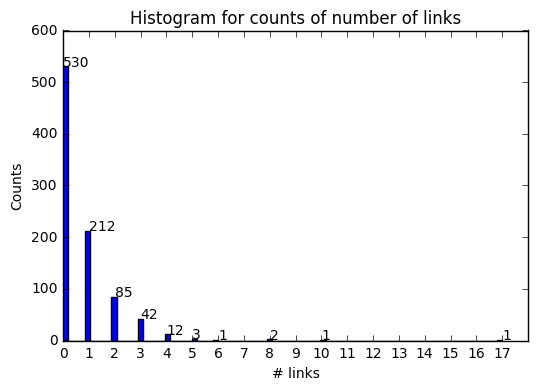

Note that 0.596 of the nodes (530/889) does not have any link.


In [61]:
from operator import itemgetter
import matplotlib.pyplot as plt

def hist(a):
    n = np.bincount(a)
    
    ax = plt.hist(a, bins='auto')  # plt.hist passes it's arguments to np.histogram
    plt.title("Histogram for counts of number of links")
    plt.ylabel('Counts')
    plt.xlabel('# links')
    plt.xticks(np.arange(min(a), max(a)+1, 1.0))
    
    for i, v in enumerate(n):
        if v:
            plt.annotate(v, xy=(i, v))
    
    plt.show()
    return n

def order_degree_numLinks(graph, N_max_degree=25):
    # order or size
    n = len(graph.nodes())
    nl = len(graph.edges())
    print ('This graph is composed of %d nodes and %d links'%(n, nl))
    
    # degree
    nd = sorted(graph.degree_iter(),key=itemgetter(1),reverse=True)
    print ('\nThe %d nodes with higher degree are: '%(N_max_degree))
    for l in nd[0:N_max_degree]:
        print ('%s: %d links'%(l[0], l[1]))
    
    print ('\nBelow we show the histogram of number of links for all the graph')
    counts = hist(np.asarray(nd)[:,1].astype(np.int))
    print ('Note that %.3f of the nodes (%d/%d) does not have any link.'%(1.*counts[0]/n, counts[0], n))

order_degree_numLinks(G)

## Local characterization (Microscale)